# Computer Vision

computer 와 machin 은 같은 개념으로 인식

computer vision : 이미지 data에서 어떤 정보를 추출(추론)하는 것

- 실용적 발전이 많아 : 이론적 근거가 없는 경우가 많다. => 해보니까 잘되더라.
- 하지만, 반론도 많이 나와서 주이론이 자주 바뀐다.

vision 은 인공지능(AI) 기법을 쓰는 쪽과 안쓰는 쪽이 있는데, 우리는 AI를 쓰는 쪽을 택한다.  
2~3년 안에 페러다임의 변화가 자주 온다.


### Graphic vs Image

Graphic 이 좀 더 큰 개념

보통 3차원 = Graphic  
보통 2차원, 래스터 = Image

원레 다른 개념이지만, 일반적으로 같은개념으로 사용하는 경우가 많다.

일반인들은  
Graphic = Vector (선 이미지)  
Image = Raster (점 이미지)  

Graphic 기법은 인공지능 기법이 거의 안들어감.  
Raster 에 집중

### Image

- 2차원 함수로 정의된다.
- (x, y) 가 공간 좌표 = 강도 
- (27, 7) = 120 // (0, 32) = 0 등으로 표현

=> Image = Function(함수) = array(배열)  
=> 이미지는 함수이자 배열

        우리가 이미지를 본다면 

        01 01 02 03 02 01 00  
        01 10 23 42 32 11 42  
        12 43 52 21 01 02 03  
        43 21 44 23 15 32 00 

        컴퓨터는 로 보게 된다.

### segementation

classification 에서 자동차라면, 이미지에서 자동차라고 구분해 낸다.

Object segmentation : 이미지에서 자동차를 구분  
Instance segmentation : 이미지에서 자동차를 구분하면서 각 자동차들 끼리도 구분

---
# 실습

## image file => numpy 기반 array

### open / imread
외부 라이브러리 사용
- opencv   (open : 공짜 , cv : computer vision)  => BGR로 불러움
    https://docs.opencv.org/4.5.5/

- skimage (= like sklearn)  
    numpy -> scipy (ndimage) -> scipy-toolit 에서 ML 이 sklearn, Image가 skimage

- imageio  
    이미지를 불러오는 기능, numpy와 호환.
    
- PIL (python image library)  
    python 기반 : tensorflow, pytorch 에서 이미지 관련된선 다 PIL 로 만들어짐

### View
imshow 


In [4]:
import PIL

In [2]:
dir(PIL)

['UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plugins']

In [4]:
from PIL import Image
dir(PIL) # monkey patch : 겔릴라 패치 -> 고릴라 패치 -> 몽키패치 (한국 : 잠수함 패치)

['Image',
 'ImageMode',
 'TiffTags',
 'UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_util']

---
# PIL

In [5]:
# 이미지 불러오기
from PIL import Image

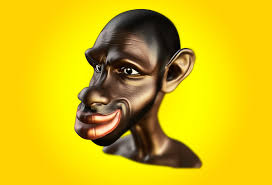

In [41]:
im = Image.open('1.jpg')
im

In [10]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [11]:
import tensorflow as tf

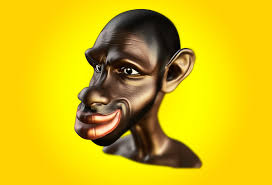

In [42]:
# tensorflow 에서도 바로 불러지는 이유는 내부에서 PIL을 쓰기 때문에
im_tf = tf.keras.preprocessing.image.load_img('1.jpg')
im_tf

In [15]:
dir(im_tf)
# '__array__', 가 있으면, numpy와 연동이 됨

['_ArrayData',
 '_Image__transformer',
 '__array__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'encoderconfig',
 'encoderinfo',
 'entro

---
# numpy

In [6]:
import numpy as np

In [44]:
# 같은 것 (기본적인 방법) 

im_tf_pil =  np.array(im_tf)
# im_tf_pil = tf.keras.preprocessing.image.img_to_array(im_tf)

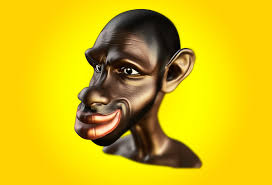

In [45]:
# 반대로 numpy 를 PIL 로 바꾸기
tf.keras.preprocessing.image.array_to_img(im_tf_pil)

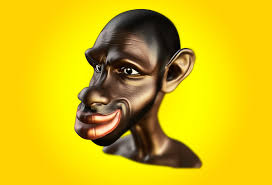

In [46]:
# PIL 자체에서 numpy 를 PIL 로 바꾸기
Image.fromarray(im_tf_pil)

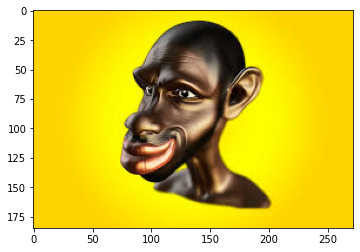

In [47]:
# array 를 이미지로 바로 보기

import matplotlib.pyplot as plt

plt.imshow(im_tf_pil)

In [34]:
# matplot 에서도 볼 수 있는데, 잘 안씀 => png 등 투명파일 못 불러옴
plt.imread('1.jpg')

array([[[108, 181, 216],
        [108, 181, 216],
        [108, 181, 214],
        ...,
        [222, 223, 218],
        [223, 224, 218],
        [224, 225, 219]],

       [[108, 181, 216],
        [108, 181, 216],
        [109, 182, 217],
        ...,
        [222, 223, 218],
        [223, 224, 218],
        [224, 225, 219]],

       [[107, 181, 218],
        [107, 181, 216],
        [108, 182, 217],
        ...,
        [221, 222, 217],
        [222, 223, 218],
        [223, 224, 219]],

       ...,

       [[ 31,  32,  24],
        [ 29,  30,  22],
        [ 26,  27,  21],
        ...,
        [ 17,  20,  13],
        [ 19,  20,  14],
        [ 20,  21,  15]],

       [[ 28,  29,  21],
        [ 27,  28,  20],
        [ 25,  26,  20],
        ...,
        [ 18,  21,  14],
        [ 20,  21,  15],
        [ 21,  22,  16]],

       [[148, 149, 141],
        [148, 149, 141],
        [147, 148, 142],
        ...,
        [144, 147, 140],
        [146, 147, 141],
        [147, 148, 142]]

---
# imageio

In [7]:
# pip install imageio

import imageio  # 가장 막강하고 다양한 포멧을 불러 올 수 있다.

# 이미지, 동영상 등 , 불러들이고 저장하는데 최적화 되어있다.

In [39]:
dir(imageio)

['FormatManager',
 'RETURN_BYTES',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'config',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imiter',
 'imopen',
 'imread',
 'imread_v2',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'typing',
 'v2',
 'v3',
 'volread',
 'volsave',
 'volwrite',
 'warnings']

In [49]:
# 넘파이를 
imio = imageio.imread('1.jpg')
type(imio).mro()

[imageio.core.util.Array, numpy.ndarray, object]

In [50]:
issubclass(type(imio), np.ndarray)

True

---
# skimage

In [8]:
# pip install scikit-image

from skimage import io
im_sk = io.imread('1.jpg')

In [76]:
im_sk.shape

(185, 272, 3)

In [69]:
im_sk

# [255, 211,   2] => (0, 0) 값 / 3채널
# R : im_sk[...,0] 
# G : im_sk[...,1] 
# B : im_sk[...,2] 

array([[[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]],

       [[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]],

       [[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]],

       ...,

       [[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]],

       [[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]],

       [[255, 211,   2],
        [255, 211,   2],
        [255, 211,   2],
        ...,
        [255, 211,   2],
        [255, 211,   2],
        [255, 211,   2]]

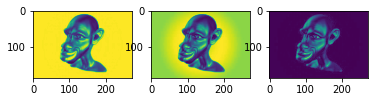

In [89]:
plt.subplot(131)
plt.imshow(im_sk[...,0])
plt.subplot(132)
plt.imshow(im_sk[...,1])
plt.subplot(133)
plt.imshow(im_sk[...,2])
plt.show()

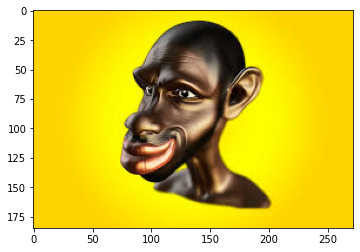

In [70]:
plt.imshow(im_sk)

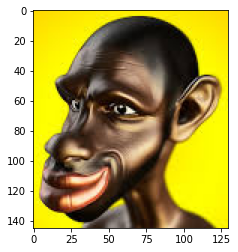

In [87]:
plt.imshow(im_sk[5:150, 70:200])

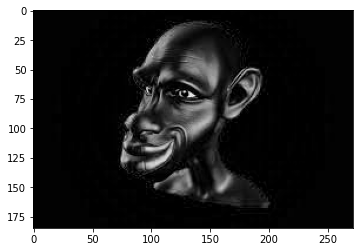

In [91]:
# 2차원 이미지는 , 색상정보가 없고 밝기만 있다. 자동으로 기본컬러가 입혀져서 지정해 줘야함
plt.imshow(im_sk[:,:,2], cmap='gray')
# cmap 으로 컬러정보를 입혀줘야 함

---

image

channels : 컬러 3채녈, 흑백 1채널



---
# opencv

In [9]:
# pip install opencv-python
import cv2

In [65]:
im_cv = cv2.imread('1.jpg')

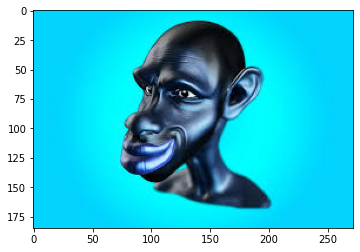

In [66]:
plt.imshow(im_cv) 
# 색이 제대로 안나옴
# RGB => red / green / blue
# opencv => blue / red / green 
# 순서가 달라서

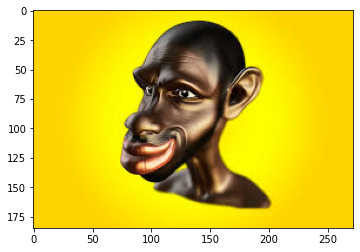

In [106]:
im_cv_BGR2RGB = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
plt.imshow(im_cv_BGR2RGB)

---
### cv2 추가

In [107]:
# 0을 추가하면, 흑백으로 불러옴
cv2.imread('1.jpg', 0)

cv2.IMREAD_GRAYSCALE('1.jpg')

array([[200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       ...,
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200]], dtype=uint8)

In [122]:
cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

array([[200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       ...,
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200],
       [200, 200, 200, ..., 200, 200, 200]], dtype=uint8)

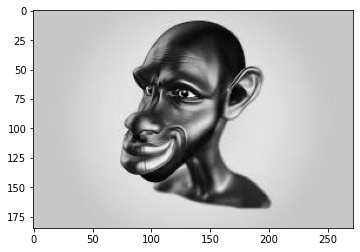

In [109]:
plt.imshow(cv2.imread('1.jpg', 0), cmap='gray')

In [115]:
# 옵션 찾아 보고 싶을 때, 만들어서 하기 (c에서는 많이 사용함)
for i in dir(cv2):
    if "IMREAD" in i:
        print(i, getattr(cv2, i))

IMREAD_ANYCOLOR 4
IMREAD_ANYDEPTH 2
IMREAD_COLOR 1
IMREAD_GRAYSCALE 0
IMREAD_IGNORE_ORIENTATION 128
IMREAD_LOAD_GDAL 8
IMREAD_REDUCED_COLOR_2 17
IMREAD_REDUCED_COLOR_4 33
IMREAD_REDUCED_COLOR_8 65
IMREAD_REDUCED_GRAYSCALE_2 16
IMREAD_REDUCED_GRAYSCALE_4 32
IMREAD_REDUCED_GRAYSCALE_8 64
IMREAD_UNCHANGED -1


In [116]:
# 컴프리헨션으로 만들면 
[( i, getattr(cv2,i)) for i in dir(cv2) if 'IMREAD' in i]

# cv2.imread('1.jpg', 0) <= 0이 ('IMREAD_GRAYSCALE', 0) 에서 온것이다.

[('IMREAD_ANYCOLOR', 4),
 ('IMREAD_ANYDEPTH', 2),
 ('IMREAD_COLOR', 1),
 ('IMREAD_GRAYSCALE', 0),
 ('IMREAD_IGNORE_ORIENTATION', 128),
 ('IMREAD_LOAD_GDAL', 8),
 ('IMREAD_REDUCED_COLOR_2', 17),
 ('IMREAD_REDUCED_COLOR_4', 33),
 ('IMREAD_REDUCED_COLOR_8', 65),
 ('IMREAD_REDUCED_GRAYSCALE_2', 16),
 ('IMREAD_REDUCED_GRAYSCALE_4', 32),
 ('IMREAD_REDUCED_GRAYSCALE_8', 64),
 ('IMREAD_UNCHANGED', -1)]

In [120]:
[( i, getattr(cv2,i)) for i in dir(cv2) if 'COLOR_BGR2' in i]

[('COLOR_BGR2BGR555', 22),
 ('COLOR_BGR2BGR565', 12),
 ('COLOR_BGR2BGRA', 0),
 ('COLOR_BGR2GRAY', 6),
 ('COLOR_BGR2HLS', 52),
 ('COLOR_BGR2HLS_FULL', 68),
 ('COLOR_BGR2HSV', 40),
 ('COLOR_BGR2HSV_FULL', 66),
 ('COLOR_BGR2LAB', 44),
 ('COLOR_BGR2LUV', 50),
 ('COLOR_BGR2Lab', 44),
 ('COLOR_BGR2Luv', 50),
 ('COLOR_BGR2RGB', 4),
 ('COLOR_BGR2RGBA', 2),
 ('COLOR_BGR2XYZ', 32),
 ('COLOR_BGR2YCR_CB', 36),
 ('COLOR_BGR2YCrCb', 36),
 ('COLOR_BGR2YUV', 82),
 ('COLOR_BGR2YUV_I420', 128),
 ('COLOR_BGR2YUV_IYUV', 128),
 ('COLOR_BGR2YUV_YV12', 132)]

---

### 주의 (2차원 이미지)

In [93]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [94]:
X_train.shape

(60000, 28, 28)

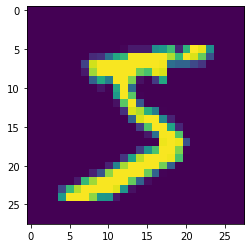

In [95]:
plt.imshow(X_train[0])

# 2차원 데이터이지만, matplot 에서 자동으로 컬러 정보를 입힌힌다.
# 원본으로 보려면 cmap='gray' 해줘야 함

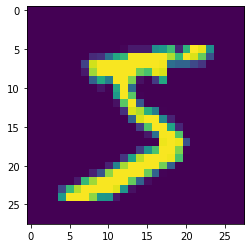

In [97]:
# 1채널로 지정해 준다고 하면
im = X_train[0].reshape(28,28,1)

# 컬러가 아닌데 컬러로 지정해 보여줌
plt.imshow(im)

### matplotlip의 한계

In [101]:
# 왜 255 로 나누어 주나??
im_255 = im/255

# 0 ~ 255 중
# x - 최소값 / 최대값 - 최소값
# = x - 0 / 255 - 0 
# = x / 255

###### 왜 255로 나누어 주는가?
# 데이터 타입이 'unit8' 에서 'float64'로 바뀜 (상대적인 값으로 보여줌)
# 0~255 에서 0~1 사이 값으로 바꿈
# 연속적이 값으로 바뀌어서 미분이 가능하게 만듦

# 만약 뭔본으로 학습을 시작하면, float 을 바꾸느라 손해, 학습시간 오래걸려 손해
# ( x_train, x_test = x_train /255.0, x_test /255.0 )

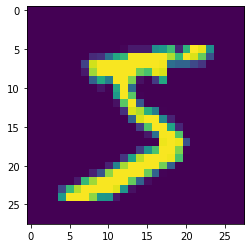

In [102]:
plt.imshow(im_255)

---
---
---

# 이미지 처리

computer vision 과 이미지 처리는 목적이 다르다.

이미지 처리 => 알고리즘을 통해 다른 이미지로 바꿈  
computer vision => 이미지에서 유용한 정보를 얻음

---

# 이미지 연산

In [10]:
im_sk = io.imread('1.jpg')

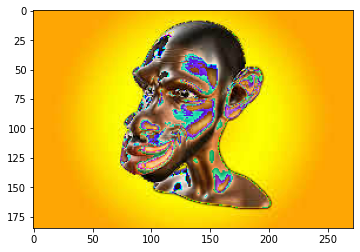

In [129]:
# 더하기
plt.imshow(im_sk + im_sk)

In [139]:
im_sk[0][0]

array([255, 211,   2], dtype=uint8)

In [140]:
# modular 연산 (나누기)
(im_sk + im_sk)[0][0]

array([254, 166,   4], dtype=uint8)

In [137]:
(255 + 255) % 256 # (0~255 니까 256개)

254

---

In [141]:
np.array_equal(np.add(im_sk, im_sk), im_sk+im_sk)

True

In [143]:
np.add(im_sk, im_sk)[0][0]

array([254, 166,   4], dtype=uint8)

In [146]:
# opencv 는 saturated 연산 (포화연산)
cv2.add(im_sk, im_sk)[0][0]

array([255, 255,   4], dtype=uint8)

---

https://docs.opencv.org/3.4/d3/df2/tutorial_py_basic_ops.html

In [147]:
im_sk.shape

(185, 272, 3)

In [148]:
im_sk.dtype

dtype('uint8')

In [149]:
# 185 * 272 * 3 = 픽셀의 수
im_sk.size

150960

In [ ]:
# cv.split / cv.merge 도 있지만, numpy 쓰는 이유
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

# Numpy indexing is faster!
img[:,:,2] = 0

In [ ]:
# 하지만 numpy 가 귀찮음
# 빠르긴 하지만, 테두리를 만들던가 하는 자동화 기능이 cv가 훨씬 좋음
np.full((190, 277, 3))

---

### Image Addition (더하기 연산 법)

이미지에서 높다는 숫자는?

RGB 에서 0은 검은색, 255는 흰색 : 값이 높으면 밝아짐

이때 값을 더한다는 의미는 modular 연산과 saturated 연산이 있다.

In [153]:
x = np.uint8([250])
y = np.uint8([10])

print( cv2.add(x,y) ) # 250+10 = 260 => 255

print( x+y )          # 250+10 = 260 % 256 = 4


[[255]]
[4]


### Image Blending

g(x) = (1−α)f0(x) + αf1(x)

α = 0.2 라고 할때,

g(x) = 0.8 f0(x) + 0.2 f1(x)  
g(x) = 0.8 A + 0.2 B

이는 가중치를 줘서 이미지를 합친다 (오버랩 되게 이미지 겹치기)

In [155]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv-logo.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### AND, OR, XOR 연산

https://dojang.io/mod/page/view.php?id=173

In [1]:
# and 연산자 (비트연산)
3 & 2

2

In [15]:
im_sk[0][0:3]

array([[255, 211,   2],
       [255, 211,   2],
       [255, 211,   2]], dtype=uint8)

In [16]:
(im_sk & im_sk)[0][0:3]

array([[255, 211,   2],
       [255, 211,   2],
       [255, 211,   2]], dtype=uint8)

In [17]:
4 & 4 
# 2진수로
# 100 & 100 = 4

4

In [25]:
print(bin(4)[2:])


100
